In [1]:
import convokit

In [2]:
corpus = convokit.Corpus(filename=convokit.download('reddit-corpus-small'))

Dataset already exists at /Users/calebchiam/.convokit/downloads/reddit-corpus-small


Let's get the fighting words for r/Christianity and r/atheism:

In [4]:
fw = convokit.FightingWords(ngram_range=(1,1))

Initializing default CountVectorizer...


In [5]:
fw.fit(corpus, class1_func=lambda utt: utt.meta['subreddit'] == 'Christianity', 
               class2_func=lambda utt: utt.meta['subreddit'] == "atheism",)

class1_func returned 2659 valid utterances. class2_func returned 2736 valid utterances.
Vocab size is 2028
Comparing language...
ngram zscores computed.


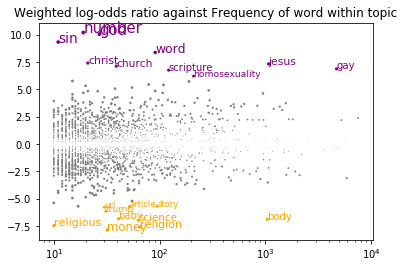

In [6]:
df = fw.summarize(corpus, plot=True)

In [7]:
df['class'] = (df['z-score'] >= 0).apply(lambda x: ["class2", "class1"][int(x)])

In [8]:
c1, c2 = fw.get_ngrams_past_threshold()

In [10]:
c1[:10]

['number',
 'god',
 'sin',
 'word',
 'christ',
 'jesus',
 'church',
 'gay',
 'scripture',
 'homosexuality']

In [11]:
df.head()

,z-score,class
ngram,,
money,-7.881672,class2
religion,-7.609281,class2
religious,-7.470374,class2
science,-6.988469,class2
body,-6.905783,class2


In [12]:
# %matplotlib inline
# %matplotlib qt
fw.summarize(corpus).head(10)

,z-score,class
ngram,,
money,-7.881672,class2
religion,-7.609281,class2
religious,-7.470374,class2
science,-6.988469,class2
body,-6.905783,class2
baby,-6.847558,class2
trump,-6.159806,class2
url,-5.788592,class2
article,-5.721652,class2


In [13]:
fw.summarize(corpus).tail(10)

,z-score,class
ngram,,
homosexuality,6.207816,class1
scripture,6.755024,class1
gay,6.873843,class1
church,7.119714,class1
jesus,7.321852,class1
christ,7.403784,class1
word,8.369534,class1
sin,9.325556,class1
god,10.048027,class1


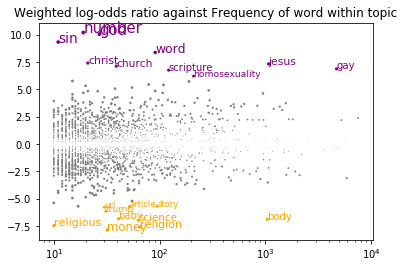

In [14]:
fw.plot_fighting_words()

In [ ]:
# Words that are more typical of r/Christianity

In [15]:
fw.get_zscore("love")

5.437285134893405

In [16]:
fw.get_zscore("forgive")

2.0309029658831173

In [17]:
fw.get_zscore("repent")

3.2031837682217175

In [18]:
fw.get_zscore("marriage")

2.3619140874575693

In [19]:
# Words that are more typical of r/atheism

In [20]:
fw.get_zscore("government")

-4.289907330786152

In [21]:
fw.get_zscore("state")

-3.6035513105575387

In [ ]:
fw.get_zscore("separation")

In [ ]:
fw.get_zscore('education')

In [ ]:
fw.get_zscore('morals')

In [ ]:
fw.annot_method

In [ ]:
fw.transform(corpus)

In [ ]:
list(fw.get_top_k_ngrams()[0])

In [ ]:
for utt in corpus.iter_utterances():
    if utt.meta["subreddit"] in ["atheism", "Christianity"]:
        if len(utt.meta['fighting_words_class1']) > 0:
            print(utt.meta['subreddit'])
            print(utt.meta['fighting_words_class1'])
            print(utt.meta['fighting_words_class2'])
            print(utt.text)
            break